In [1]:
### COMPUTATIONAL PHYSICS
### Final, Problem 2B & 2C: Projectile Motion with Air Resistance

# Many elementary mechanics problems deal with the physics of objects moving through the 
# air, but they almost always ignore friction and air resistance. 

# Consider a spherical cannon ball shot through air. The air resistance on a moving sphere
# is a force in the opposite direction with the magnitude:

# F = (1/2)π*R^2*ρ*C*v^2

# where R is the sphere’s radius , ρ the density of air, v is the velocity, and C is the 
# coefficient of drag (dependent of the shape of the object).

### Name:  Carson Huey-You


In [2]:
### 1. IMPORT PACKAGES

import math as math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


In [3]:
### 2. PARAMETERS & INITIAL CONDITIONS

## AIR & GROUND PARAMETERS

air_density = 1.19#kg/m3
drag_coeff = 0.47

g = 9.81#m/s2
ground = 0.#m


## CANNONBALL PARAMETERS

# List of Densities:
# ρ_Pb = 11300 kg/m3
# ρ_W = 19300 kg/m3
# ρ_Ni = 8900 kg/m3

selected_element = "Pb"
density = 11300#kg/m3  ->  11.3 g/cm3 
radius  = 0.06#m       ->  6cm

volume = (4/3)*np.pi*(radius**3)
mass = density*volume


## CANNON PARAMETERS

Y_init = 12#m
V_init = 110#m/s
Θ_init = np.radians(38)

Vx_init = V_init * np.cos(Θ_init)
Vy_init = V_init * np.sin(Θ_init)


## FOR COMPUTATION

K = (1/2)*np.pi*(radius**2)*density*drag_coeff #such that F = Kv^2



In [4]:
### 3A. DEFINE FUNCTIONS

# Define functions for dx/dt and dy/dt.

def dx_dt(Vx):
    return Vx

def dy_dt(Vy):
    return Vy


In [5]:
### 3B. DEFINE FUNCTIONS

# Define functions for dVx/dt and dVy/dt.

def dVx_dt(Vx, Vy):
    
    return -(K/mass)*Vx*np.sqrt((Vx**2) + (Vy**2))

def dVy_dt(Vx, Vy):
    
    return -g -(K/mass)*Vy*np.sqrt((Vx**2) + (Vy**2))



In [6]:
### 3C. DEFINE INTEGRATORS

## RK4 Integrator

def RK4(h, Func, P):
    
    k1 = h*Func(P)
    k2 = h*Func(P + 0.5*k1)
    k3 = h*Func(P + 0.5*k2)
    k4 = h*Func(P + k3)
    
    return (1/6)*(k1 + 2*k2 + 2*k3 + k4) #= Func(t + h)


In [7]:
### 3C. DEFINE INTEGRATORS

## RK4 Integrators for Two Variables

def RK_1(h, Func, P, Q):
    
    k1 = h*Func(P, Q)
    k2 = h*Func(P + 0.5*k1, Q)
    k3 = h*Func(P + 0.5*k2, Q)
    k4 = h*Func(P + k3, Q)
    
    return (1/6)*(k1 + 2*k2 + 2*k3 + k4) #= Func(t + h)


def RK_2(h, Func, P, Q):
    
    k1 = h*Func(P, Q)
    k2 = h*Func(P, Q + 0.5*k1)
    k3 = h*Func(P, Q + 0.5*k2)
    k4 = h*Func(P, Q + k3)
    
    return (1/6)*(k1 + 2*k2 + 2*k3 + k4) #= Func(t + h)


In [8]:
### 3D. DEFINE FUNCTION TO GET ARRAYS

def get_r_arr(t, pos_init, vel_init):
    
    #            X     Y
    #pos_arr = [[0.,   12.]
    #           [..,   ..]]
    
    #            Vx    Vy
    #vel_arr = [[0.,   12.]
    #           [..,   ..]]
    
    pos_arr = np.zeros( shape = (len(t), 2) )
    vel_arr = np.zeros( shape = (len(t), 2) )
    
    pos_arr[0] = pos_init
    vel_arr[0] = vel_init
    
    step = (max(t) - min(t))/len(t)
    print(f"Used a step size of {step}, from {min(t)} to {max(t)}.")
    
    for j in range(0, len(t)-1):
        #r_arr[j+1][0] = r_arr[j][0] + Euler(h, dtheta_dt(r_arr[j][1]))
        #r_arr[j+1][1] = r_arr[j][1] + Euler(h,     dV_dt(r_arr[j][0]))
        
        pos_arr[j+1][0] = pos_arr[j][0] + RK4(step, dx_dt, vel_arr[j][0])
        pos_arr[j+1][1] = pos_arr[j][1] + RK4(step, dy_dt, vel_arr[j][1])
        
        vel_arr[j+1][0] = vel_arr[j][0] + RK_1(step, dVx_dt, vel_arr[j][0], vel_arr[j][1])
        vel_arr[j+1][1] = vel_arr[j][1] + RK_2(step, dVy_dt, vel_arr[j][0], vel_arr[j][1])
        
        if pos_arr[j+1][0] == 0:
            break
        
        #print(r_arr[j])
    
    #print(t, r_arr)
    return pos_arr, vel_arr
    

Used a step size of 0.0003, from 0.0 to 15.0.


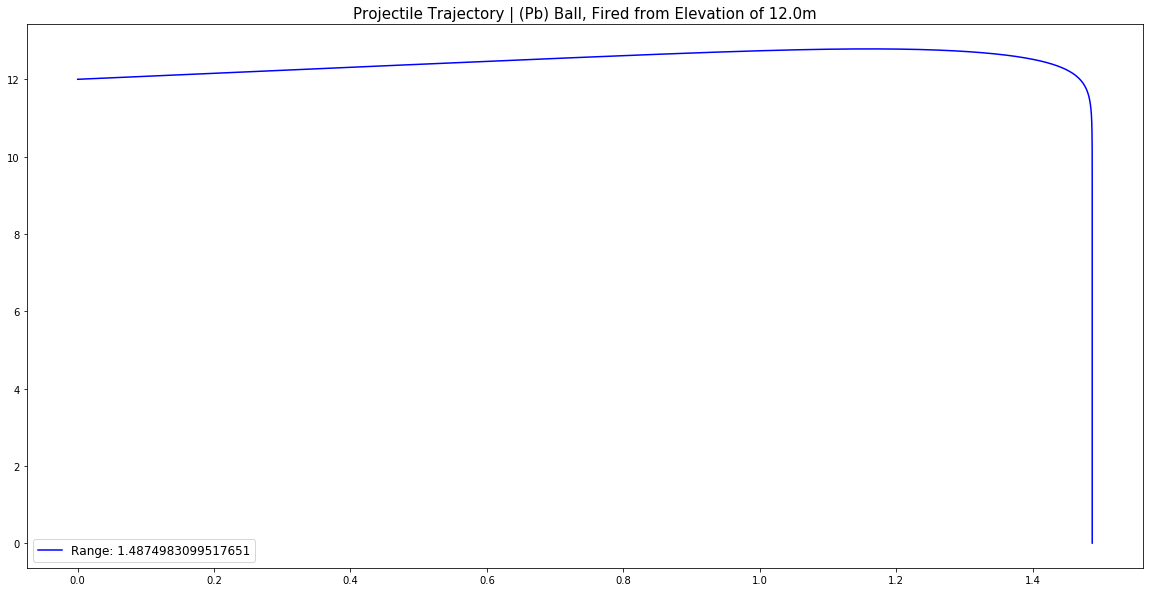

In [9]:
### 4. PLOTTING TRAJECTORY

fig = plt.figure(figsize=(20,10))

# Initial Conditions
pos_init = np.array([0., Y_init])
vel_init = np.array([Vx_init, Vy_init])

time = np.linspace(0, 15, 50000)

pos, vel = get_r_arr(time, pos_init=pos_init, vel_init=vel_init)

mask = (pos[:,1] >= ground)

plt.title(f"Projectile Trajectory | ({selected_element}) Ball, Fired from Elevation of {pos_init[1]}m", size=15)

plt.plot(pos[:,0][mask], pos[:,1][mask], color='blue', label=f"Range: {max(pos[:,0][mask])}")
plt.legend(loc='lower left', prop={'size': 12})

plt.show()


Used a step size of 0.0003, from 0.0 to 15.0.


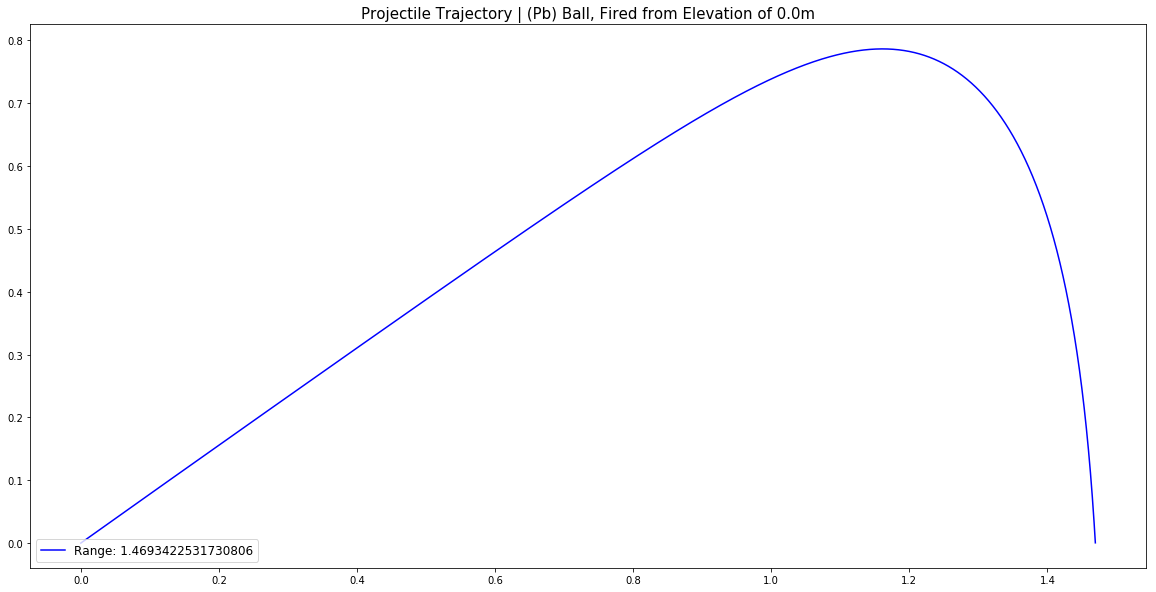

In [10]:
### 4. PLOTTING TRAJECTORY

fig = plt.figure(figsize=(20,10))

# Initial Conditions
pos_init = np.array([0., 0.])
vel_init = np.array([Vx_init, Vy_init])

time = np.linspace(0, 15, 50000)

pos, vel = get_r_arr(time, pos_init=pos_init, vel_init=vel_init)

mask = (pos[:,1] >= ground)

plt.title(f"Projectile Trajectory | ({selected_element}) Ball, Fired from Elevation of {pos_init[1]}m", size=15)

plt.plot(pos[:,0][mask], pos[:,1][mask], color='blue', label=f"Range: {max(pos[:,0][mask])}")
plt.legend(loc='lower left', prop={'size': 12})

plt.show()



In [ ]:
### 5. ANSWER FOR PART 2C.

# One can show that for a spherical object, the given equation reduces
# such that mass, volume and density all cancel out.  The constant in
# the acceleration equations only depend on the radius of the 
# cannonball fired.

